In [1]:
## Import different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE

In [2]:
## Reading the data
data = pd.read_csv('hypothyroid.csv')

In [3]:
## Print the first five rows of the data
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [4]:
## Shape of the data
data.shape

(3772, 30)

##### The data has 3772 rows and 30 columns.

In [5]:
## Columns
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [6]:
## Checking the missing values
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

##### We can see that there are no missing values. But if we see the dataset the missing values are replaced with the invalid values like '?'. Let's replace such values with 'nan' and check for the missing values again.

In [7]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


In [8]:
## Let's drop some unnecessary columns
data=data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG'],axis=1)

In [9]:
## Now replace the '?' values with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [10]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


##### So, we have replaced all such values with 'nan' values.

In [11]:
##  Unique Values
for column in data.columns:
    print(column,(data[column].unique()))

age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
sex ['F' 'M' nan]
on_thyroxine ['f' 't']
query_on_thyroxine ['f' 't']
on_antithyroid_medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid_surgery ['f' 't']
I131_treatment ['f' 't']
query_hypothyroid ['f' 't']
query_hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3'

### Handling Missing Values

In [12]:
data['age'].fillna((data['age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)

In [13]:
## Impute nan value of sex column
data['sex_Var']=np.where(data['sex'].isnull(),1,0)
frequent=data['sex'].mode()[0]
data['sex'].fillna(frequent,inplace=True)

### Handling nominal categorical variables

In [14]:
## We will perform one hot encoding for nominal categorical variable.
sex = data[["sex"]]
sex = pd.get_dummies(sex, drop_first= True)

In [15]:
on_thyroxine = data[["on_thyroxine"]]
on_thyroxine = pd.get_dummies(on_thyroxine, drop_first= True)

In [16]:
query_on_thyroxine = data[["query_on_thyroxine"]]
query_on_thyroxine = pd.get_dummies(query_on_thyroxine, drop_first= True)

In [17]:
on_antithyroid_medication = data[["on_antithyroid_medication"]]
on_antithyroid_medication = pd.get_dummies(on_antithyroid_medication, drop_first= True)

In [18]:
sick = data[["sick"]]
sick = pd.get_dummies(sick, drop_first= True)

In [19]:
pregnant = data[["pregnant"]]
pregnant = pd.get_dummies(pregnant, drop_first= True)

In [20]:
thyroid_surgery = data[["thyroid_surgery"]]
thyroid_surgery = pd.get_dummies(thyroid_surgery, drop_first= True)

In [21]:
I131_treatment = data[["I131_treatment"]]
I131_treatment = pd.get_dummies(I131_treatment, drop_first= True)

In [22]:
query_hypothyroid = data[["query_hypothyroid"]]
query_hypothyroid = pd.get_dummies(query_hypothyroid, drop_first= True)

In [23]:
query_hyperthyroid = data[["query_hyperthyroid"]]
query_hyperthyroid = pd.get_dummies(query_hyperthyroid, drop_first= True)

In [24]:
lithium = data[["lithium"]]
lithium = pd.get_dummies(lithium, drop_first= True)

In [25]:
goitre = data[["goitre"]]
goitre = pd.get_dummies(goitre, drop_first= True)

In [26]:
tumor = data[["tumor"]]
tumor = pd.get_dummies(tumor, drop_first= True)

In [27]:
hypopituitary = data[["hypopituitary"]]
hypopituitary = pd.get_dummies(hypopituitary, drop_first= True)

In [28]:
psych = data[["psych"]]
psych = pd.get_dummies(psych, drop_first= True)

In [29]:
referral_source = data[["referral_source"]]
referral_source = pd.get_dummies(referral_source, drop_first= True)

In [30]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source', 'Class', 'sex_Var'],
      dtype='object')

In [31]:
final_df = pd.concat([data,sex, on_thyroxine, query_on_thyroxine,
       on_antithyroid_medication, sick, pregnant, thyroid_surgery,
       I131_treatment, query_hypothyroid, query_hyperthyroid, lithium,
       goitre, tumor, hypopituitary, psych,referral_source], axis = 1)

In [32]:
final_df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source', 'Class', 'sex_Var', 'sex_M', 'on_thyroxine_t',
       'query_on_thyroxine_t', 'on_antithyroid_medication_t', 'sick_t',
       'pregnant_t', 'thyroid_surgery_t', 'I131_treatment_t',
       'query_hypothyroid_t', 'query_hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other'],
      dtype='object')

In [33]:
final_df.drop(['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych','referral_source','sex_Var'], axis = 1, inplace = True)

In [34]:
## Checking the missing values
final_df.isnull().sum()

age                            0
TSH                            0
T3                             0
TT4                            0
T4U                            0
FTI                            0
Class                          0
sex_M                          0
on_thyroxine_t                 0
query_on_thyroxine_t           0
on_antithyroid_medication_t    0
sick_t                         0
pregnant_t                     0
thyroid_surgery_t              0
I131_treatment_t               0
query_hypothyroid_t            0
query_hyperthyroid_t           0
lithium_t                      0
goitre_t                       0
tumor_t                        0
hypopituitary_t                0
psych_t                        0
referral_source_SVHC           0
referral_source_SVHD           0
referral_source_SVI            0
referral_source_other          0
dtype: int64

##### Great! Now the data has no missing values.

c:\users\laboni\anaconda3\envs\thyroidprediction02\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\laboni\anaconda3\envs\thyroidprediction02\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\laboni\anaconda3\envs\thyroidprediction02\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

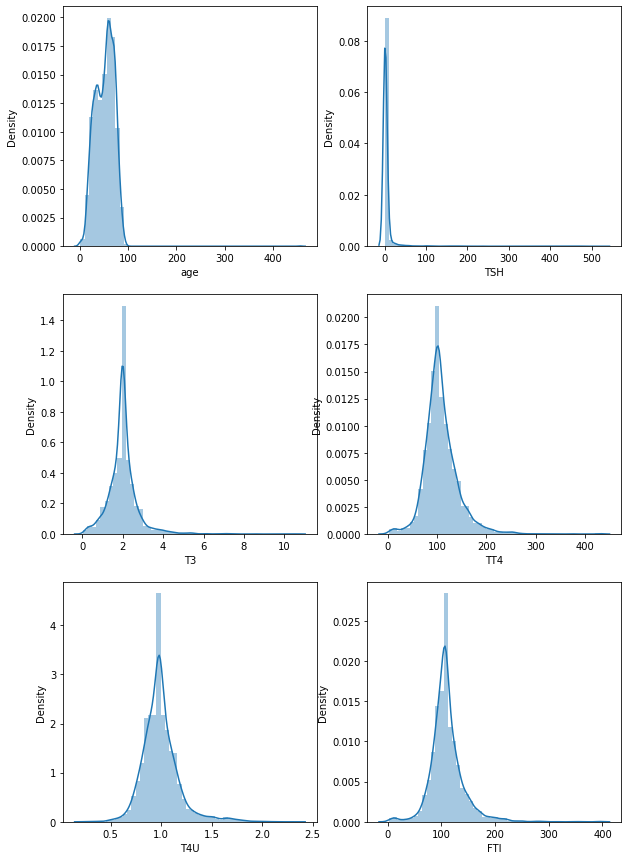

In [35]:
## Let's check the distribution for our continuous data in the dataset.
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(final_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

##### The graph TSH heavyly skewed towards left. We drop it.

In [36]:
final_df = final_df.drop(['TSH'], axis = 1)

In [37]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
final_df['Class']=lblEn.fit_transform(final_df['Class'])

c:\users\laboni\anaconda3\envs\thyroidprediction02\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

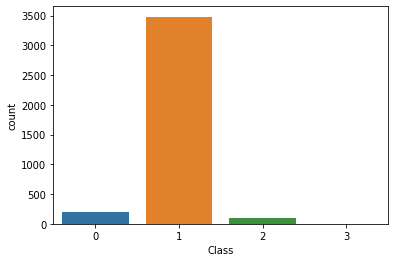

In [38]:
sns.countplot(final_df['Class'])

##### We can see that the dataset is highly imbalanced.


In [39]:
X=final_df.drop(['Class'],axis=1)
y=final_df.Class

In [40]:
rdsmple=RandomOverSampler()
X_sampled,y_sampled=rdsmple.fit_sample(X,y)

In [41]:
X_sampled.shape

(13924, 24)

In [42]:
X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)

In [43]:
X_sampled

,age,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,sick_t,...,query_hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,2.5,125,1.14,109,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,23,2,102,0.98,107,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,46,2,109,0.91,120,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,70,1.9,175,0.98,107,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,70,1.2,61,0.87,70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,41,2.5,22,0.98,107,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13920,41,2.5,22,0.98,107,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13921,46,1.2,48,0.89,54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13922,41,2.5,22,0.98,107,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


c:\users\laboni\anaconda3\envs\thyroidprediction02\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

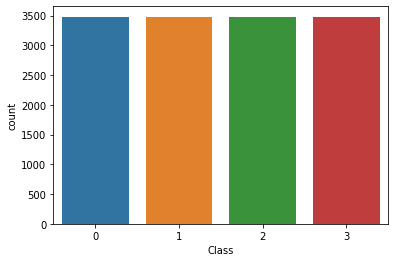

In [44]:
sns.countplot(y_sampled)

##### Great! Our dataset is balanced now.

In [45]:
X_sampled.columns

Index(['age', 'T3', 'TT4', 'T4U', 'FTI', 'sex_M', 'on_thyroxine_t',
       'query_on_thyroxine_t', 'on_antithyroid_medication_t', 'sick_t',
       'pregnant_t', 'thyroid_surgery_t', 'I131_treatment_t',
       'query_hypothyroid_t', 'query_hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=0)

### Fitting data in various models

In [47]:
def svm_classifier(X_train,X_test,y_train,y_test):
    classifier_svm=SVC(kernel='rbf',random_state=0)
    classifier_svm.fit(X_train,y_train)
    y_pred=classifier_svm.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_svm.score(X_train,y_train)}\n Test Score:{classifier_svm.score(X_test,y_test)}')

In [48]:
def knn_classifier(X_train,X_test,y_train,y_test):
    classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
    classifier_knn.fit(X_train,y_train)
    y_pred=classifier_knn.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_knn.score(X_train,y_train)}\n Test Score:{classifier_knn.score(X_test,y_test)}')

In [49]:
def naive_classifier(X_train,X_test,y_train,y_test):
    classifier_naive=GaussianNB()
    classifier_naive.fit(X_train,y_train)
    y_pred=classifier_naive.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_naive.score(X_train,y_train)}\n Test Score:{classifier_naive.score(X_test,y_test)}')

In [50]:
def tree_classifier(X_train,X_test,y_train,y_test):
    classifier_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    classifier_tree.fit(X_train,y_train)
    y_pred=classifier_tree.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_tree.score(X_train,y_train)}\n Test Score:{classifier_tree.score(X_test,y_test)}')

In [51]:
def forest_classifier(X_train,X_test,y_train,y_test):
    classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)
    classifier_forest.fit(X_train,y_train)
    y_pred=classifier_forest.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_forest.score(X_train,y_train)}\n Test Score:{classifier_forest.score(X_test,y_test)}')

In [52]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    result1=svm_classifier(X_train, X_test, y_train, y_test)
    print(result1)
    print("-"*100)
    print()

    print("KNN:\n")
    result2=knn_classifier(X_train, X_test, y_train, y_test)
    print(result2)

    print("-"*100)
    print()

    print("Naive:\n")
    result3=naive_classifier(X_train, X_test, y_train, y_test)
    print(result3)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    result4=tree_classifier(X_train, X_test, y_train, y_test)
    print(result4)

    print("-"*100)
    print()

    print("Random Forest:\n")
    result5=forest_classifier(X_train, X_test, y_train, y_test)
    print(result5)

In [53]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train Score:0.7933387198132686
 Test Score:0.8021543985637343
----------------------------------------------------------------------------------------------------

KNN:

Train Score:0.9701050363587396
 Test Score:0.9547576301615799
----------------------------------------------------------------------------------------------------

Naive:

Train Score:0.46664871173354877
 Test Score:0.4700179533213645
----------------------------------------------------------------------------------------------------

Decision Tree:

Train Score:1.0
 Test Score:0.9856373429084381
----------------------------------------------------------------------------------------------------

Random Forest:

Train Score:1.0
 Test Score:0.9942549371633752


In [54]:
## Performance Metrics
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train,y_train)
y_pred = classifier_forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[701,   0,   0,   0],
       [  5, 641,   8,   0],
       [  0,   0, 715,   0],
       [  0,   0,   0, 715]], dtype=int64)

In [55]:
pd.crosstab(y_test,y_pred,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted,0,1,2,3,All
True,,,,,
0,701,0,0,0,701
1,5,641,8,0,654
2,0,0,715,0,715
3,0,0,0,715,715
All,706,641,723,715,2785


In [56]:
## Classification Report (Accuracy, Precision, Recall and F1 Score)
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       701
           1       1.00      0.98      0.99       654
           2       0.99      1.00      0.99       715
           3       1.00      1.00      1.00       715

    accuracy                           1.00      2785
   macro avg       1.00      1.00      1.00      2785
weighted avg       1.00      1.00      1.00      2785



#### Hyperparameter Tuning

In [58]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier_forest, X=X_train,y=y_train,cv=10)
print(accuracies.mean(), accuracies.std())

0.9935361590861065 0.0020784710441671436


In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameters = {'n_estimators':[25,50,200,300],
              'criterion':['gini','entropy'],
              'max_depth':[14,20,25,30]}

In [61]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs = -1)

In [62]:
grid_search = grid_search.fit(X_train,y_train)
print('best_accuracy=',grid_search.best_score_)
print('best_parameters=',grid_search.best_params_)

best_accuracy= 0.994164444681026
best_parameters= {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 200}


In [63]:
classifier_forest = RandomForestClassifier(criterion = 'gini',
                                           max_depth = 25,
                                           n_estimators = 200,
                                           random_state = 0)
classifier_forest.fit(X_train,y_train)
y_pred = classifier_forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[701,   0,   0,   0],
       [  4, 642,   8,   0],
       [  0,   0, 715,   0],
       [  0,   0,   0, 715]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       701
           1       1.00      0.98      0.99       654
           2       0.99      1.00      0.99       715
           3       1.00      1.00      1.00       715

    accuracy                           1.00      2785
   macro avg       1.00      1.00      1.00      2785
weighted avg       1.00      1.00      1.00      2785



In [65]:
import pickle
filename = 'thyroid_model.pkl'
pickle.dump(classifier_forest,open(filename,'wb'))

In [66]:
model = open('thyroid_model.pkl','rb')
forest = pickle.load(model)

In [67]:
y_pred = forest.predict(X_test)

In [68]:
confusion_matrix(y_test, y_pred)

array([[701,   0,   0,   0],
       [  4, 642,   8,   0],
       [  0,   0, 715,   0],
       [  0,   0,   0, 715]], dtype=int64)